In [2]:
#load the csv into dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('census.csv')
df.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [7]:
#check the distribution of data

#total number of people

num_total = len(df)

#total number of people with income greate than 50k

num_greater_50k = len(df[df['income'] == '>50K'])
print num_greater_50k

#total number of people with income less than 50k

num_less_50k = len(df[df['income'] == '<=50K'])

percentage_more_50k = round((float(num_greater_50k)/(float(num_greater_50k)+float(num_less_50k)))*100,3)

print "Total number of records or people in the census: {}".format(num_total)
print "Total number of people with income greater than 50k: {}".format(num_greater_50k)
print "Total number of people with income less than 50k: {}".format(num_less_50k)
print "percentage of people with income more than 50k: {}".format(percentage_more_50k)

11208
Total number of records or people in the census: 45222
Total number of people with income greater than 50k: 11208
Total number of people with income less than 50k: 34014
percentage of people with income more than 50k: 24.784


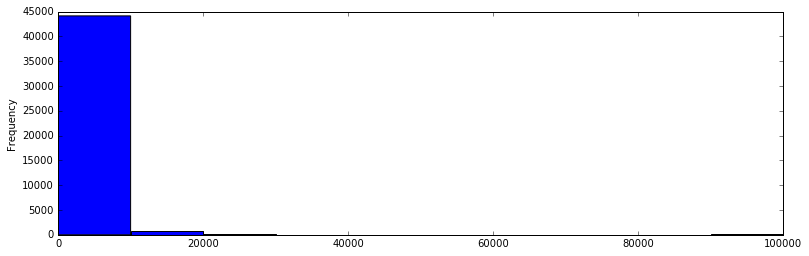

In [19]:
#distribution of Capital-gain

#df['capital-gain'].plot.hist(bins=15)
df['capital-gain'].plot(kind ='hist',figsize =(13,4))

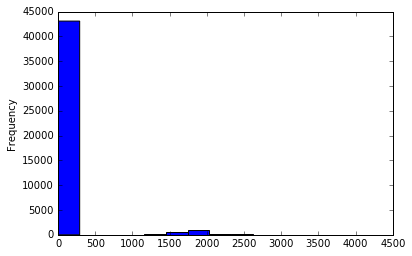

In [15]:
df['capital-loss'].plot.hist(bins=15)

In [21]:
import numpy as np
df[['capital-gain','capital-loss']]=df[['capital-gain','capital-loss']].apply(lambda x: np.log(x+1))


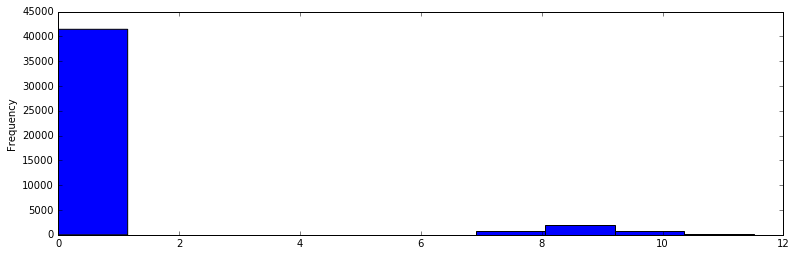

In [22]:
df['capital-gain'].plot(kind ='hist',figsize =(13,4))

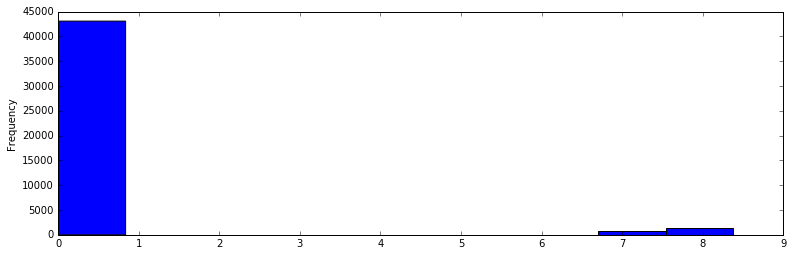

In [23]:
df['capital-loss'].plot(kind ='hist', figsize=(13,4))

In [25]:
df['income']=df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001538B668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F518FD0>]], dtype=object)

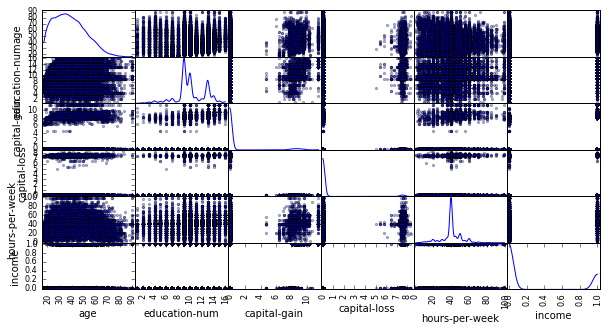

In [34]:
df.head()
pd.scatter_matrix(df, alpha = 0.3, figsize = (10,5), diagonal = 'kde')

In [29]:
#data preprocessing convert categorical to numerical

def preprocess(X):
    current = pd.DataFrame(index = X.index)
    
    for col, col_data in X.iteritems():
        
        if col_data.dtype == object:
            col_data = col_data.replace(['yes','no'],[1,0])
        if col_data.dtype == object:
            col_data = col_data.replace([True, False],[1, 0])
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
        
        current = current.join(col_data)
    return current


In [30]:
df_num = preprocess(df)

In [39]:
features_raw = df.drop('income', axis=1)
y =  df['income']

In [40]:
from sklearn import preprocessing

le_SN = preprocessing.LabelEncoder()
le_PID = preprocessing.LabelEncoder()
le_GN = preprocessing.LabelEncoder()
le_PN = preprocessing.LabelEncoder()
le_CAT = preprocessing.LabelEncoder()
le_BR = preprocessing.LabelEncoder()
le_UCN = preprocessing.LabelEncoder()
le_NEW = preprocessing.LabelEncoder()

le_SN.fit(features_raw['workclass'])
le_PID.fit(features_raw['education_level'])
le_GN.fit(features_raw['marital-status'])
le_PN.fit(features_raw['occupation'])
le_CAT.fit(features_raw['relationship'])
le_BR.fit(features_raw['race'])
le_UCN.fit(features_raw['sex'])
le_NEW.fit(features_raw['native-country'])



features_raw['workclass'] = le_SN.transform(features_raw['workclass'] )
features_raw['education_level'] = le_PID.transform(features_raw['education_level'])
features_raw['marital-status'] = le_GN.transform(features_raw['marital-status'])
features_raw['occupation'] = le_PN.transform(features_raw['occupation'])
features_raw['relationship'] = le_CAT.transform(features_raw['relationship'])
features_raw['race'] = le_BR.transform(features_raw['race'])
features_raw['sex'] = le_UCN.transform(features_raw['sex'])
features_raw['native-country'] = le_NEW.transform(features_raw['native-country'])




In [43]:
features_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,9,13.0,4,0,1,4,1,7.684784,0.0,40.0,38
1,50,4,9,13.0,2,3,0,4,1,0.000000,0.0,13.0,38
2,38,2,11,9.0,0,5,1,4,1,0.000000,0.0,40.0,38
3,53,2,1,7.0,2,5,0,2,1,0.000000,0.0,40.0,38
4,28,2,9,13.0,2,9,5,2,0,0.000000,0.0,40.0,4
